<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-dataset" data-toc-modified-id="Prepare-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare dataset</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-iris_dirty.csv" data-toc-modified-id="Import-libraries-and-iris_dirty.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and <code>iris_dirty.csv</code></a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#NaNs" data-toc-modified-id="NaNs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NaNs</a></span></li><li><span><a href="#Exploring-column-petal_width" data-toc-modified-id="Exploring-column-petal_width-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring column petal_width</a></span></li><li><span><a href="#Outliers-and--exploring-sepal_length" data-toc-modified-id="Outliers-and--exploring-sepal_length-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Outliers and  exploring sepal_length</a></span></li><li><span><a href="#Exploring-class" data-toc-modified-id="Exploring-class-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exploring class</a></span></li></ul></li><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing the data</a></span><ul class="toc-item"><li><span><a href="#Plotting-values-by-'class'" data-toc-modified-id="Plotting-values-by-'class'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting values by 'class'</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li><li><span><a href="#Modelling-with-Logistic-Regression" data-toc-modified-id="Modelling-with-Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling with Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Importing-ML-libraries" data-toc-modified-id="Importing-ML-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing ML libraries</a></span></li><li><span><a href="#Save-X-and-y-data" data-toc-modified-id="Save-X-and-y-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Save X and y data</a></span></li><li><span><a href="#Split-into-train-and-test" data-toc-modified-id="Split-into-train-and-test-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Split into train and test</a></span></li><li><span><a href="#Fit-train-to-the-model" data-toc-modified-id="Fit-train-to-the-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fit train to the model</a></span></li><li><span><a href="#Predictions-and-Accuracy-score" data-toc-modified-id="Predictions-and-Accuracy-score-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Predictions and Accuracy score</a></span></li><li><span><a href="#Explore-the-accuracy-score-for-the-predictions" data-toc-modified-id="Explore-the-accuracy-score-for-the-predictions-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Explore the accuracy score for the predictions</a></span></li></ul></li></ul></div>

# Prepare dataset

## Import libraries and `iris_dirty.csv`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris_dirty.csv',
                 names=['sepal_length',
                        'sepal_width',
                        'petal_length',
                        'petal_width',
                        'class',
                       ],
                header=None,
                )

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa


In [4]:
round(df.describe(), 2)
# we realise that petal_width is not in here
# check later why but as we can see in the 
# head above it has 'mm' in it so 
# it is an object instead of a number

,sepal_length,sepal_width,petal_length
count,151.00,150.00,151.00
mean,6.20,3.06,3.76
std,4.32,0.43,1.76
min,4.30,2.00,1.00
25%,5.10,2.80,1.60
50%,5.80,3.00,4.40
75%,6.40,3.30,5.10
max,58.00,4.40,6.90


# Exploratory Data Analysis

## NaNs

In [5]:
# Checking nans
df.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

In [6]:
# locating in which row is this nan for sepal_width
df[df['sepal_width'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [7]:
# as it is just one, fill the NaN with the mean
# you could have also dropped it too
# or do one of the things and remember you can  
# come back after modeling and try the other
df['sepal_width'] = df['sepal_width'].fillna(df['sepal_width'].mean())

## Exploring column petal_width

In [8]:
# We start exploring this column because
# we realised before that petal_width 
# is an object instead of a number
# Let's work on this

# see the content of the column check the pattern 
# to be able to remove the 'mm' part
df['petal_width'].value_counts()

2 mm     28
13 mm    13
15 mm    12
18 mm    12
14 mm     9
23 mm     8
10 mm     7
4 mm      7
3 mm      7
21 mm     6
20 mm     6
1 mm      6
19 mm     5
12 mm     5
16 mm     4
11 mm     3
25 mm     3
24 mm     3
22 mm     3
17 mm     2
5 mm      1
6 mm      1
Name: petal_width, dtype: int64

In [9]:
# replace mm with nothing and also change measurement to cms

df['petal_width'].apply(lambda x:
                        float(x.replace('mm', ''))/10)
# lambda x is each row of the column ['petal_width']
# what is next means that you are 
# replacing 'mm' and changing it to cm

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal_width, Length: 151, dtype: float64

In [10]:
# replacing the column
df['petal_width'] = df['petal_width'].apply(lambda x: float(x.replace('mm', ''))/10)

In [11]:
df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,class
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
round(df.describe(), 2)
# now we do have petal_width also, fixed!

,sepal_length,sepal_width,petal_length,petal_width
count,151.00,151.00,151.00,151.00
mean,6.20,3.06,3.76,1.20
std,4.32,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,58.00,4.40,6.90,2.50


## Outliers and  exploring sepal_length

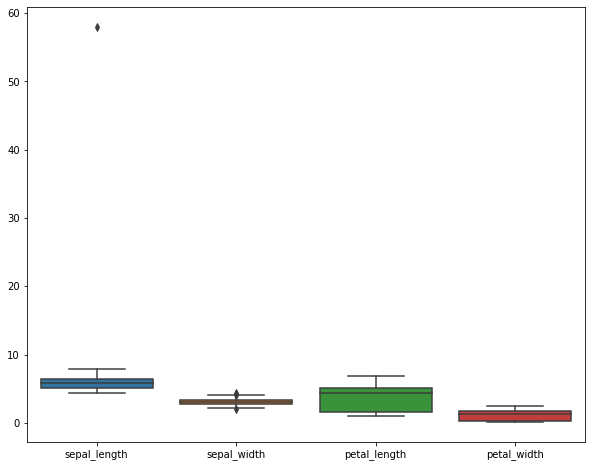

In [13]:
# check outliers
plt.figure(figsize = (10, 8))
sns.boxplot(data=df);

In [14]:
# locate the row
df[df['sepal_length']>50]

,sepal_length,sepal_width,petal_length,petal_width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [15]:
# there's probably an error with the decimal
# once we locate the row we apply the /10 only to the 'sepal_length' column 
# (in this case only to the 58.0 value because there's only a row)
corrected_value = df[df['sepal_length']>50]['sepal_length']/10

In [16]:
# put the corrected one in the row 
df.loc[143, 'sepal_length'] = float(corrected_value)

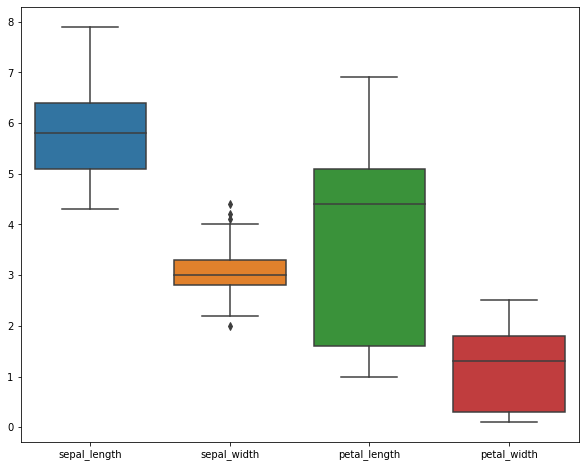

In [17]:
# see how the plot changes without the outiler
plt.figure(figsize = (10, 8))
sns.boxplot(data=df);

## Exploring class

In [20]:
# Spelling mistake
df['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: class, dtype: int64

In [25]:
# lambda x is each row of the column class
# next is what you want to do to this x
# put Iris-setosa if the row is 'Iris-setsoa'
# otherwise leave it as 'Iris-setosa'

# See the column after saving it
df['class'].apply(
    lambda x: 'Iris-setosa' 
    if x == 'Iris-setsoa' 
    else x)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: class, Length: 151, dtype: object

In [26]:
# Saving the changes by replacing
# the typos (only one in this case) column 
# with the data
df['class'] = df['class'].apply(
    lambda x: 'Iris-setosa' 
    if x == 'Iris-setsoa' 
    else x)

In [27]:
# Solved!
df['class'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

# Visualizing the data

## Plotting values by 'class'

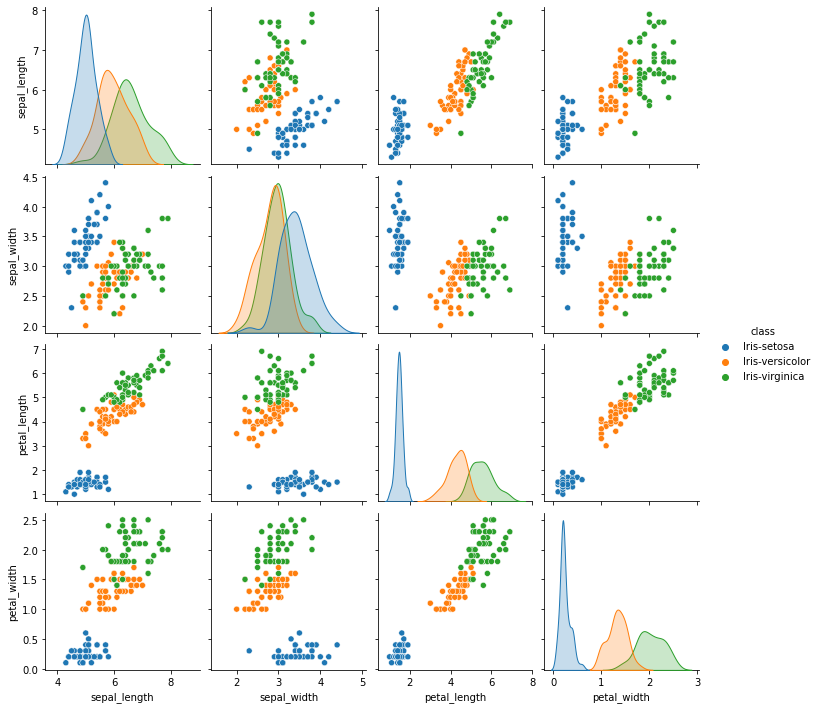

In [53]:
# Easier to start with this plot 
# for a general view of all the data
sns.pairplot(df, hue='class');

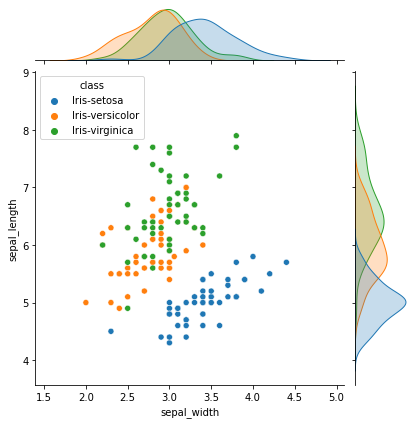

In [54]:
# Best to spot details
sns.jointplot(data=df, x='sepal_width', y = 'sepal_length', hue='class');

## Correlations

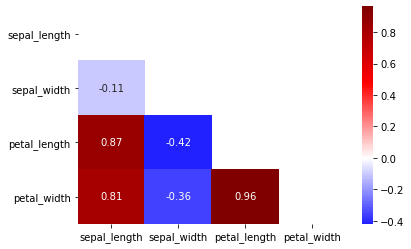

In [56]:
# Defining mask so that we only see the values once
# We're only interested in the one direction 
# correlation(column A with B)
# the other direction (column B with A) yields are the same value

mask = np.zeros_like(df.drop('class', axis=1).corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.drop('class', axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();

# Modelling with Logistic Regression

## Importing ML libraries

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Save X and y data

In [48]:
# Numerical data (in this case all of it) but the target one
X = df.drop('class', axis=1)

In [49]:
# Save the target data 
# (the one we want to predict)
y = df['class']

## Split into train and test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=30)

## Fit train to the model

In [58]:
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train);

## Predictions and Accuracy score

In [59]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)
# Accuracy for the split done before: 30-70

0.9347826086956522

## Explore the accuracy score for the predictions

TO BE CONTINUED FROM HERE...